4.1 누락된 데이터 다루기

In [94]:
import pandas as pd
from io import StringIO
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df=pd.read_csv(StringIO(csv_data))
# 스트링 IO는 CSV파일을 데이터프레임으로 변경함
print(df)
    

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN


In [95]:
df.isnull().sum()
# df.isnull까지하면 널값이 있는지 없는지를 참 거짓으로 표현하며 썸을하면 해당 참값을 센다

A    0
B    0
C    1
D    1
dtype: int64

4.1.2 누락된 값이 있는 훈련 샘플이나 특성 제외

In [96]:
df.dropna(axis=1)
# 결측치가 있는 열자체를 날려버림

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [97]:
df.dropna(how="all")

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [98]:
df.dropna(thresh=4)
# 난값이 아닌게 4개보다 작은 행을 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [99]:
df.dropna(subset=["C"])
# C에서 난값있는 행을 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


4.1.3 누락된 값 대체    

In [100]:
from sklearn.impute import SimpleImputer
import numpy as np
imr=SimpleImputer(missing_values=np.nan,strategy="mean")
imr=imr.fit(df.values)
imputed_data=imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [101]:
df.fillna(method="bfill")

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,12.0,8.0
2,10.0,11.0,12.0,NaN


In [102]:
df.fillna(method="ffill")

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,3.0,8.0
2,10.0,11.0,12.0,8.0


In [103]:
df.fillna(method="ffill",axis=1)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,6.0,8.0
2,10.0,11.0,12.0,12.0


4.2.1 판다스를 사용한 범주형 데이터 인코딩

In [104]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


4.2.2순서가 있는 특성 매핑

In [105]:
size_mapping={"XL":3,"L":2,"M":1}   
# 딕셔너리 형태로 사이즈별로 숫자를 매칭해줌
df["size"]=df["size"].map(size_mapping)
# 사이즈칼럼에 값들을 siz_mapping 딕셔너리에 매핑되어있는 값들로 바꿈
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [106]:
inv_size_mapping={v:k for k,v in size_mapping.items()}
# 딕셔너리 순서를 바꿔서
print(inv_size_mapping)
df["size"].map(inv_size_mapping)
# 다시바꿈

{3: 'XL', 2: 'L', 1: 'M'}


0     M
1     L
2    XL
Name: size, dtype: object

4.2.3 클래스 레이블 인코딩

In [107]:
import numpy as np
class_mapping={label:idx for idx,label in enumerate(np.unique(df["classlabel"]))}
# 클래스라벨에 클래스가 2개라는 것을 알고 시작함 클래스를 중복제거하고 1차원 배열로 출력해서 인덱스와 클래스를 튜플형태로 엮음 
# 딕셔너리 컴프리헨션 형태로 클래스와 인덱스가 있는 딕셔너리를 만듬 
class_mapping

{'class1': 0, 'class2': 1}

In [108]:
df["classlabel"]=df["classlabel"].map(class_mapping)
df
# 클래스를 정수형태로 바꿈

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [109]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df
# 다시 클래스로 변환하기

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [110]:
from sklearn.preprocessing import LabelEncoder
class_le=LabelEncoder()
y=class_le.fit_transform(df["classlabel"].values)
y
# 정수로 변환하는 라벨 엔코더

array([1, 0, 1])

In [111]:
class_le.inverse_transform(y)
# 다시 문자열형태로 변환하기

array(['class2', 'class1', 'class2'], dtype=object)

4.2.4 순서가 없는 특성에 원-핫 인코딩 적용

In [112]:
X=df[["color","size","price"]].values
# 데이터프레임의 색 사이즈 가격 칼럼의 값들만 가지고와서 X에 넣음 
color_le=LabelEncoder()
# 라벨엔코더 함수를 넣고
X[:,0]=color_le.fit_transform(X[:,0])
# X모든행의 0번칼럼에 대해서 라벨엔코딩을 해서 다시넣음 즉 컬러값이 라벨엔코딩이됨
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

4.2.4 순서가 없는 특성에 원핫인코딩 적용

In [113]:
from sklearn.preprocessing import OneHotEncoder
X=df[["color","size","price"]].values
color_ohe=OneHotEncoder()
color_ohe.fit_transform(X[:,0].reshape(-1,1)).toarray()
# X의 모든행 0번칼럼(컬러)에 대해서 칼럼이1개인 모양으로 만들고 그거를 원핫인코딩을함 그린 레드 블루3가지니까 3개 칼럼이 나올것



array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [114]:
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
# 데이터프레임에서 3가지 칼럼의 값들을 들고와서
c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(), [0]),
                               ('nothing', 'passthrough', [1, 2])])
# c_transf변수에 컬럼트랜스퍼 함수를 넣고 
c_transf.fit_transform(X)

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

In [115]:
pd.get_dummies(df[["price","color","size"]])
# 원핫 인코딩하는 더 쉬운 방법임 다만 데이터값이 문자열일 경우 원핫인코딩을 하지만 
# 나머지 숫자열들은 그대로 둔다.

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [116]:
pd.get_dummies(df[["price","color","size"]],columns=["size"])
# 변환하려는 칼럼을 구체적으로 지정할 수도 있음

,price,color,size_1,size_2,size_3
0,10.1,green,1,0,0
1,13.5,red,0,1,0
2,15.3,blue,0,0,1


In [117]:
pd.get_dummies(df[["price","color","size"]],drop_first=True)
# 열하나를 삭제할 수도 있다 이렇게 해도 삭제되지 않은놈이 0일때 삭제된놈이1일테니 잃는 정보는 없고
# 다중공성선문제를 개선할 수 있음

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [118]:
color_ohe=OneHotEncoder(categories="auto",drop="first")
c_transf=ColumnTransformer([("onehot",color_ohe,[0]),("nothing","passthrough",[1,2])])
c_transf.fit_transform(X)

array([[1.0, 0.0, 1, 10.1],
       [0.0, 1.0, 2, 13.5],
       [0.0, 0.0, 3, 15.3]], dtype=object)

4.3 데이터셋을 훈련 데이터셋과 테스트 데이터셋으로 나누기

In [119]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)
# 와인데이터셋을 불러오기

In [121]:
print(df_wine)
df_wine.columns
# 데이터 셋이 이렇게 있는데 칼럼값이 숫자로 되어있음

     0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065  
1    3.40  1050  
2    3.17

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [122]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
# 데이터프레임의 칼럼값을 추가해준것임

In [124]:
print("클레스 레이블",np.unique(df_wine["Class label"]))

#클래스 레이블에서 중복값을 제거해서 리스트로 만들었더니 1,2,3 

클레스 레이블 [1 2 3]


In [125]:
df_wine.head()
# 5행까지만 출력해봄

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [126]:
from sklearn.model_selection import train_test_split
X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
# 7댜3으로 분류되고 클래스비율도 테스트셋과 원본데이터 셋이 유지됨


In [127]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train_norm=mms.fit_transform(X_train)
X_test_norm=mms.transform(X_test)

In [128]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_train_std=stdsc.fit_transform(X_train)
X_test_std=stdsc.transform(X_test)

In [133]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver="liblinear",penalty="l1",C=1.0,random_state=1)
# l1규제가 있는 함수를 만듬
lr.fit(X_train_std,y_train)
# lr함수에 학습을 시킴
print("훈련 정확도:",lr.score(X_train_std,y_train))
print("테스트 정확도 :",lr.score(X_test_std,y_test))

훈련정확도: 1.0
테스트 정확도 : 1.0


In [134]:
lr.intercept_
# 위의 테스트 셋으로 훈련시킨뒤의 편향값을 출력
# 첫번째 값은 클래스 1과 클래스 2,3을 구분 두번째는 클래스 2와 클래스 1,3을 구분

array([-1.26392152, -1.21596534, -2.37040177])

In [135]:
lr.coef_
# 위의 테스트 셋으로 훈련 시킨뒤의 가중치 배열을 출력
# 가중치에 데이터를 곱해서 최종 입력을 계산을 할텐데 특성이 13개이기 때문에 13개의 가중치를 갖는다 이때 클래스가 3개기 때문에 행이 3개다. 

array([[ 1.24567209,  0.18072301,  0.74682115, -1.16438451,  0.        ,
         0.        ,  1.1595535 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55864751,  2.50891241],
       [-1.53644846, -0.38769843, -0.99485417,  0.36489012, -0.05989298,
         0.        ,  0.66853184,  0.        ,  0.        , -1.93460212,
         1.23246414,  0.        , -2.23212696],
       [ 0.1355558 ,  0.16880291,  0.35718019,  0.        ,  0.        ,
         0.        , -2.43768478,  0.        ,  0.        ,  1.5635432 ,
        -0.81834553, -0.4930494 ,  0.        ]])

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

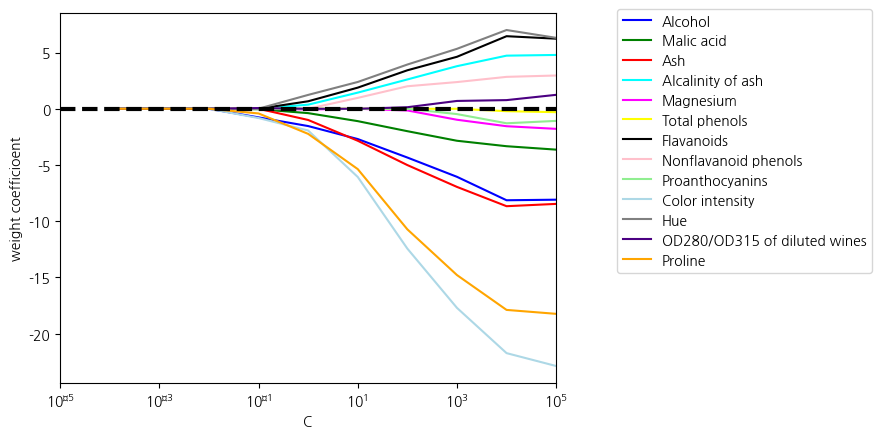

In [166]:
import matplotlib.pyplot as plt
fig=plt.figure()
# 왜 넣는지 모르겠음
ax=plt.subplot(111)
# 111서브플롯을 만듬
colors= ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']
# 컬러스라는 변수에 여러 색깔명들을 넣어서 리스트를 만듬
weights,params=[],[]
# 공 리스트를 만듬
for c in np.arange(-4.,6.):
    # -4부터 6까지 리스트를 만들어서 c에 하나씩 넣어보면서 반복함
    lr=LogisticRegression(solver="liblinear",penalty="l1",C=10.**c,random_state=0)
    # 로지스틱회귀 solver는 liblinear l1규제를 쓰고 매개변수 C를 바꿔넣어어봄 ,랜덤 규제하기위해 랜덤 스테이트
    lr.fit(X_train_std,y_train)
    # 학습을 시키고
    weights.append(lr.coef_[1])
    # 공 리스트에 가중치 1번칼럼을 추가
    params.append(10**c)
    # params에는 매개변수 C값 없데이트

weights=np.array(weights)
# 웨이트는 배열로 만듬

for column,color in zip(range(weights.shape[1]),colors):
    # 칼럼수만큼의 숫자를 칼럼에 컬러에는 위에서 정의한 색들을 넣어준다.
    plt.plot(params,weights[:,column],label=df_wine.columns[column+1],color=color)
    # X축에는 C값을 y축에는 가중치들로 그래프를 그림
plt.axhline(0,color="black",linestyle="--",linewidth=3)
# 수평선 그림
plt.xlim([10**(-5),10**5])
# X값 제한
plt.ylabel("weight coefficioent")
plt.xlabel("C")
# x축 y축값 이름 넣어줌
plt.xscale("log")
# X스케일은 로그로 변경
plt.legend(loc="upper left")
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
# 범례 설정
plt.show()
# 플롯 출력

위에 그래프 해석은 규제를 많이주면 즉 C값이 작아지면 가중치가 0이된다. 즉 규제가 된다. 

In [175]:
range(13)

range(0, 13)

4.5.4 순차 특성 선택 알고리즘
SBS알고리즘은 아직 사이킷런에 구현되어있지 않음 직접 코드를 만들어보자

SBS라는 클래스를 정의함 
1) 초기값 설정 
2) fit 매서드
3) transform 매서드
4) _calc_score 매서드

In [188]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
            # 클래스 생성 시 각각의 변수에 함수 실행시 파라미터 값에 해당하는 변수들을 넣는다

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)
  # fit함수 실행시 트레인 셋과 테스트 셋을 원래 사이킷런 함수를 써서 쪼개고 거기에 들어가는 옵션 값은 생성자 메서드정의시들어간 값들이 들어감
        dim = X_train.shape[1]
# dim은 X_train데이터의 칼럼 수임
        self.indices_ = tuple(range(dim))
 #  indicies_는 0이상 dim 미만의 리스트를 만들고 다시 튜플로 만든것임 뜻자체가 인덱스라는 뜻
        self.subsets_ = [self.indices_]
        # 인덱스를 리스트로 만들어서 서브셋에 넣음
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        # 스코어값을 스코어에 저장
        self.scores_ = [score]
        # 스코어를 리스트 형태로 self.scores에 저장

        while dim > self.k_features:
            # k피쳐 보다 dim이 작아질때 까지 반복
            scores = []
            subsets = []
# 공리스트를 만들고
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            # scores에서 최댓값의 인덱스를 best에 넣고
            self.indices_ = subsets[best]
            # 
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        return X[:, self.indices_]
   # 행은 그대로 칼럼은 학습데이터 만치만 출력하게끔 함
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
    # 스코어 값을 출력하게끔 칼스코어 메서드를 정의함

In [189]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
# 최근접 숫자는 5로 KNN분류기를 씀
sbs=SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)
# 학습시킴

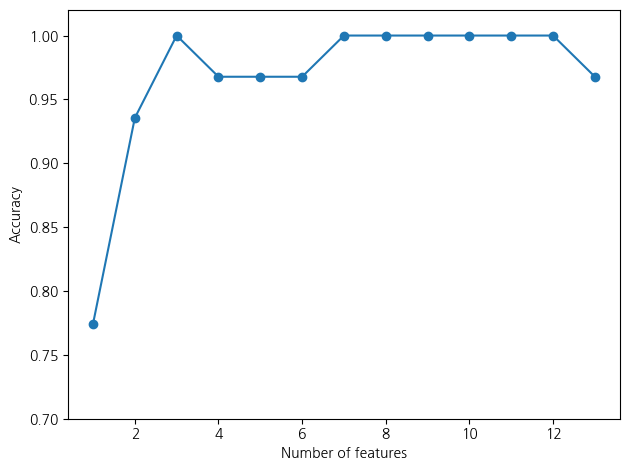

In [220]:
k_feat=[len(k) for k in sbs.subsets_]
# subset의 길이를 하나씩 리스트화해서 k_feat에 넣음
plt.plot(k_feat,sbs.scores_,marker="o")
# x는 k_feat,y는 스코어 점수로 그래프를 그리고
plt.ylim([0.7,1.02])
# y제한은 0.7부터 1.02로 둠
plt.ylabel("Accuracy")
plt.xlabel("Number of features")
# y라벨 x라벨에 특성 숫자, 정확도라는 라벨을 붙여주고
plt.grid()
# 격자무늬 그리기
plt.tight_layout()
# 여백 감소
plt.show()
# 플롯 출력

In [192]:
k3=list(sbs.subsets_[10])
# k3조합의 성능이 좋으니 어떤 특성들을 뽑은것인지 보고 싶어서 해봄
# 서브셋의 10번쨰면 0,1,11인데 리스트화를 함
print(df_wine.columns[1:][k3])
# 1부터 칼럼을 뽑고 맨앞에 class label이라는 거를 제거하기 위해서 1:0 슬라이싱을 하고 K3 0,1,11번째 칼럼을 뽑아냄 


Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [194]:
knn.fit(X_train_std,y_train)
print("훈련 정확도:",knn.score(X_train_std,y_train))
print("테스트 정확도:",knn.score(X_test_std,y_test))   
# 각각에 대해 훈련 score를 계산해봄

      

훈련 정확도: 0.967741935483871
테스트 정확도: 0.9629629629629629


In [195]:
knn.fit(X_train_std[:,k3],y_train)
# K3는[0,1,11]이니 0,1,11 칼럼과 y_train데이터 셋으로 학습을 시키고
print("훈련 정확도:",knn.score(X_train_std[:,k3],y_train))  
print("테스트 정확도:",knn.score(X_test_std[:,k3],y_test))
# 특성을 3개로 줄인 다음에 학습을 시켜보니 전체 데이터셋을 훈련시킨거랑 비교했을떄랑 큰차이 없음

훈련 정확도: 0.9516129032258065
테스트 정확도: 0.9259259259259259


In [207]:
print(k3)

[0, 1, 11]


In [208]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 11),
 (0, 1, 2, 3, 4, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 11),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 11),
 (0, 1, 2, 11),
 (0, 1, 11),
 (0, 11),
 (0,)]

4.6 랜덤포레스트의 특성 중요도 사용

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


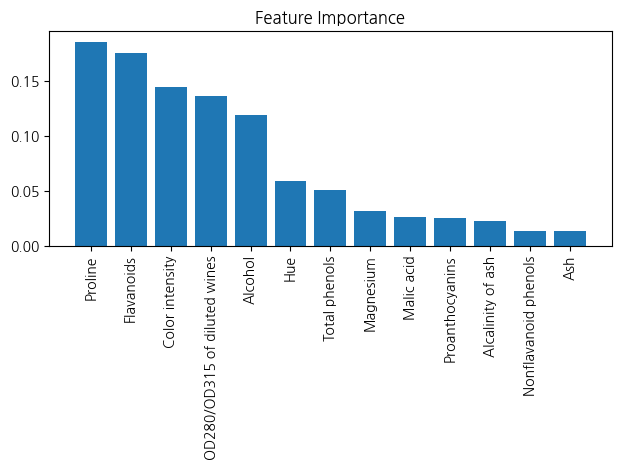

In [241]:
from sklearn.ensemble import RandomForestClassifier
feat_labels=df_wine.columns[1:]
# 클라스 라벨 떄고 칼럼 값들 feat label에 집어넣음
forest=RandomForestClassifier(n_estimators=500,random_state=1)
# 랜덤포레스트 분류기를 forest에 넣고 앙상블하는 트리의 갯수는 500개로 설정
forest.fit(X_train,y_train)
#학습
importances=forest.feature_importances_
# 특성 중요도 메서드를 importances에 집어넣고 
indices=np.argsort(importances)[::-1]
# 중요도를 오름차순으로 배열해서
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))
# for함수를 써서 중요도 값을 출력함 포매팅함수를 써서 각각 중요도를 출력함
plt.title("Feature Importance")
# 제목은 feature importance
plt.bar(range(X_train.shape[1]),importances[indices],align="center")
# 막대그래프를 그림 x값은 칼럼값, y값은 중요도 indices가 argsort된 채로 들어오니 오름차순 으로 얼라인은 센터
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
# 트레인 데이터의 칼럼 갯수만큼 리스트를 만들고 그 리스트에 칼럼값들을 x축 눈금에 집어넣고 각도를 90도 준다.
plt.tight_layout()
# 여백조절
plt.show()
# 플롯 출력


In [242]:
from sklearn.feature_selection import SelectFromModel
sfm=SelectFromModel(forest,threshold=0.1,prefit=True)
X_selected=sfm.transform(X_train)
print("이 임계 조건을 만족하는 샘플의 수:",X_selected.shape[1])
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))
# 사용자가 지정한 임계값 0.1 이상의 특성을 선택

이 임계 조건을 만족하는 샘플의 수: 5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
